In [1]:
# import important libraries

%matplotlib inline
import sys
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score

In [2]:
# Make a dataframe of the file "insurance_claim.csv"

data_filename = 'insurance_claim.csv'
df = pd.read_csv(data_filename)

In [3]:
# Take a quick look of the data, notice that the response variable is binary

df.head()

,age,insuranceclaim
0,18.437371,0
1,19.539508,0
2,19.921685,0
3,20.625442,0
4,21.139852,0


In [4]:
# Assign age as the predictor variable 
x = df["age"].values

# Assign insuranceclaim as the response variable
y = df["insuranceclaim"].values


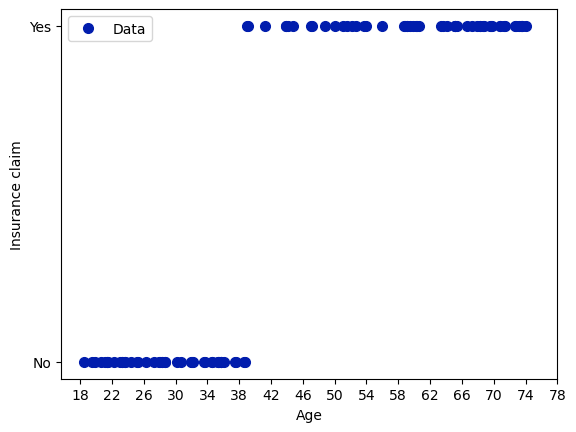

In [5]:
# Make a plot of the response (insuranceclaim) vs the predictor (age)
plt.plot(x,y,'o', markersize=7,color="#011DAD",label="Data")

# Add the labels for the axes
plt.xlabel("Age")
plt.ylabel("Insurance claim")

plt.xticks(np.arange(18, 80, 4.0))

# Label the value 1 as 'Yes' & 0 as 'No'
plt.yticks((0,1), labels=('No', 'Yes'))
plt.legend(loc='best')
plt.show()

Guesstimate the values of $\beta_0$ & $\beta_1$

Refer to the logistic regression slides for information of how they affect the shape of the logistic (sigmoid) curve. 

*Hint: It may help to focus on the age value that looks like the point of change in the plot. The logistic regression formula should result in a 0.5 probability with your guesstimated betas for that age value in order to achieve a good accuracy.*


In [29]:
### edTest(test_beta_guesstimate) ###

beta0 = -27.3

beta1 = 0.7


Define the logistic function below and use it to predict the probability of a positive response value given each value of `age` in the dataset.

Store these predicted probabilities in the variable `probas` which can be a list or array. You can do this through looping or take advantage of vector operations.

Note: It is acceptable for this exercise to access the external `beta0` & `beta1` variables in your `logistic` function.

Hint: `np.exp()` may be useful here.

In [30]:
### edTest(test_beta_computation) ###
def logistic(x):
    return 1 / (1 + np.exp(-(beta0 + beta1 * x)))
    
# P(y=1|x_i) for each x_i in x
probas = [logistic(x_i) for x_i in x]



**Convert the probabilities to classifications**

If the predictions are above a threshold of 0.5, predict 1, otherwise predict 0. Store the predicted class labels in `y_pred`


In [31]:
# Get classification predictions

probas = pd.DataFrame(probas)

y_pred = probas[0].apply(lambda x: 1 if x > 0.5 else 0)

**Calculate Accuracy**

See if you can get an accuracy above 90%

In [33]:
### edTest(test_acc) ###
# Use accuracy_score function to find the accuracy 

accuracy = accuracy_score(y, y_pred)

# Print the accuracy
print(accuracy)

1.0


Complete the plot by providing the correct data (see label arguments for guidance).

This plot will help you adjust your betas for better accuracy.

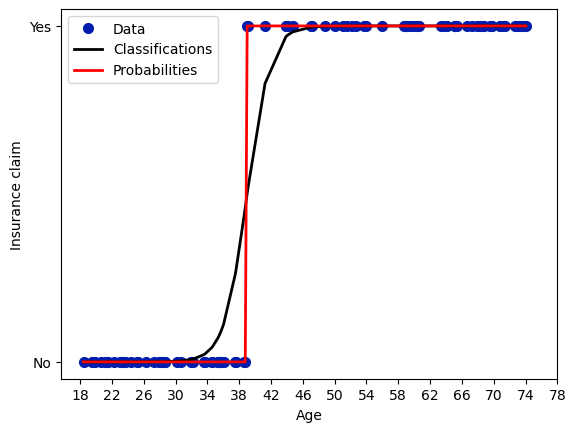

In [34]:
# Make a plot similar to the one above along with the fit curve
plt.plot(x, y,'o', markersize=7,color="#011DAD",label="Data")

plt.plot(x,probas,linewidth=2,color='black',label="Classifications")
plt.plot(x,y_pred,linewidth=2,color='red',label="Probabilities")

plt.xticks(np.arange(18, 80, 4.0))
plt.xlabel("Age")
plt.ylabel("Insurance claim")
plt.yticks((0,1), labels=('No', 'Yes'))
plt.legend()
plt.show()

## ⏸ Post exercise question:

In this exercise, you may have had to stumble around to find the right values of $\beta_0$ and $\beta_1$ to get accurate results.

Although you may have used visual inspection to find a good fit, in most problems you would need a quantative method to measure the performance of your model. (*Loss function*)

Which of the following below are **NOT** possible ways of quantifying the performance of the model.

- A. Compute the mean squared error loss of the predicted labels.
- B. Evaluate the log-likelihood for this Bernoulli response variable.
- C. Go the the temple of Apollo at Delphi, and ask the high priestess Pythia
- D. Compute the total number of misclassified labels.

In [0]:
### edTest(test_quiz) ###

# Put down your answers in a string format below (using quotes)

# for. eg, if you think the options are 'A' & 'B', input below as "A,B"

answer = "C"